## Building Models for the IMDB Reviews Dataset

### Imports

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Download and Prepare the Dataset

In [ ]:
imdb, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete0VEFO4/imdb_reviews-train.tfrecord…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete0VEFO4/imdb_reviews-test.tfrecord*…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incomplete0VEFO4/imdb_reviews-unsupervised.t…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s, l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())

for s, l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [52]:
vocab_size = 80000
max_length = 120
trunc_type = 'post'
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
# len(tokenizer.word_index)

sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences, maxlen=max_length, truncating= trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

### Plot Utility

In [49]:
import matplotlib.pyplot as plt

def plot_graph(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

### Model 1: Flatten

In [53]:
embedding_dim = 64
dense_dim = 6

model_flatten = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_flatten.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_flatten.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 120, 64)           5120000   
                                                                 
 flatten_4 (Flatten)         (None, 7680)              0         
                                                                 
 dense_16 (Dense)            (None, 6)                 46086     
                                                                 
 dense_17 (Dense)            (None, 1)                 7         
                                                                 
Total params: 5,166,093
Trainable params: 5,166,093
Non-trainable params: 0
_________________________________________________________________


In [54]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

history_flatten = model_flatten.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 36s 176ms/step - loss: 0.5327 - accuracy: 0.7156 - val_loss: 0.3509 - val_accuracy: 0.8459
Epoch 2/10
196/196 [==============================] - 20s 101ms/step - loss: 0.1849 - accuracy: 0.9364 - val_loss: 0.3949 - val_accuracy: 0.8229
Epoch 3/10
196/196 [==============================] - 14s 71ms/step - loss: 0.0352 - accuracy: 0.9955 - val_loss: 0.3862 - val_accuracy: 0.8432
Epoch 4/10
196/196 [==============================] - 9s 44ms/step - loss: 0.0083 - accuracy: 0.9996 - val_loss: 0.4063 - val_accuracy: 0.8457
Epoch 5/10
196/196 [==============================] - 6s 33ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.4274 - val_accuracy: 0.8462
Epoch 6/10
196/196 [==============================] - 6s 33ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.4465 - val_accuracy: 0.8460
Epoch 7/10
196/196 [==============================] - 4s 20ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.4586 - val_accuracy: 0

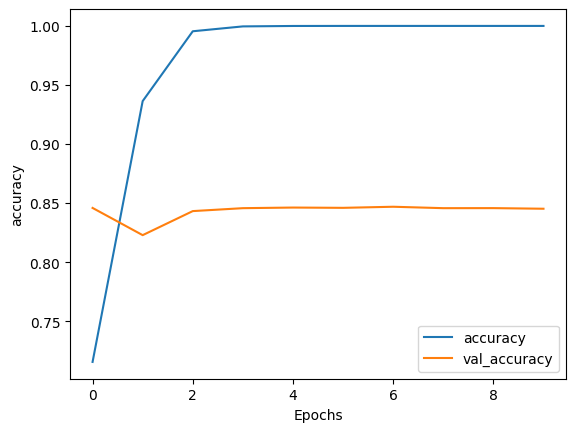

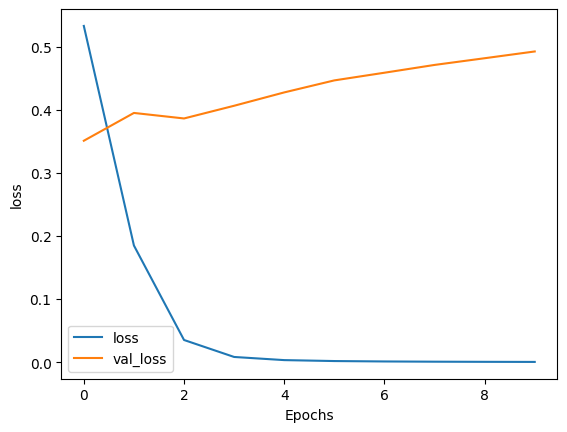

In [55]:
plot_graph(history_flatten, 'accuracy')
plot_graph(history_flatten, 'loss')

### LSTM

In [56]:
embedding_dim = 16
lstm_dim = 32
dense_dim = 6

model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 120, 16)           1280000   
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               12544     
 nal)                                                            
                                                                 
 dense_18 (Dense)            (None, 6)                 390       
                                                                 
 dense_19 (Dense)            (None, 1)                 7         
                                                                 
Total params: 1,292,941
Trainable params: 1,292,941
Non-trainable params: 0
_________________________________________________________________


In [57]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

history_lstm = model_lstm.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 42s 193ms/step - loss: 0.5227 - accuracy: 0.7242 - val_loss: 0.3799 - val_accuracy: 0.8357
Epoch 2/10
196/196 [==============================] - 22s 109ms/step - loss: 0.2594 - accuracy: 0.8993 - val_loss: 0.3802 - val_accuracy: 0.8359
Epoch 3/10
196/196 [==============================] - 14s 72ms/step - loss: 0.1401 - accuracy: 0.9518 - val_loss: 0.4129 - val_accuracy: 0.8237
Epoch 4/10
196/196 [==============================] - 11s 57ms/step - loss: 0.0814 - accuracy: 0.9740 - val_loss: 0.5128 - val_accuracy: 0.7982
Epoch 5/10
196/196 [==============================] - 8s 42ms/step - loss: 0.0674 - accuracy: 0.9784 - val_loss: 0.6795 - val_accuracy: 0.8129
Epoch 6/10
196/196 [==============================] - 8s 41ms/step - loss: 0.0396 - accuracy: 0.9881 - val_loss: 0.7175 - val_accuracy: 0.8118
Epoch 7/10
196/196 [==============================] - 7s 34ms/step - loss: 0.0267 - accuracy: 0.9925 - val_loss: 0.7334 - val_accuracy: 

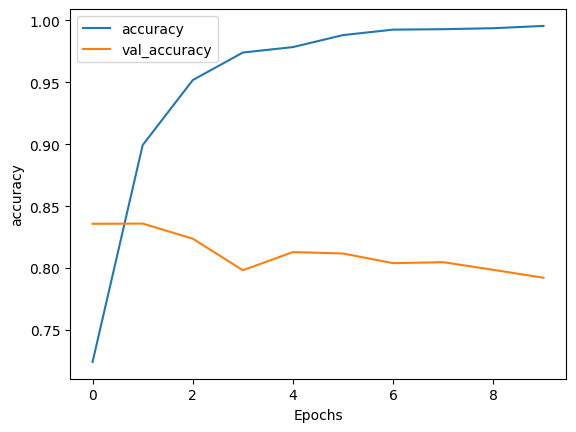

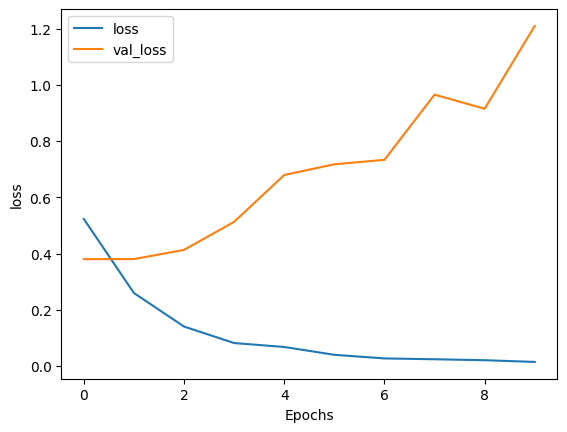

In [58]:
plot_graph(history_lstm, 'accuracy')
plot_graph(history_lstm, 'loss')

### GRU

In [66]:
import tensorflow as tf


embedding_dim = 64
gru_dim = 64
dense_dim = 6

model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [67]:
model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [68]:
model_gru.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_11 (Embedding)    (None, 120, 64)           5120000   
                                                                 
 bidirectional_5 (Bidirectio  (None, 128)              49920     
 nal)                                                            
                                                                 
 dense_22 (Dense)            (None, 6)                 774       
                                                                 
 dense_23 (Dense)            (None, 1)                 7         
                                                                 
Total params: 5,170,701
Trainable params: 5,170,701
Non-trainable params: 0
_________________________________________________________________


In [69]:
NUM_EPOCHS = 10
BATCH_SIZE = 128

history_gru = model_gru.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/10
196/196 [==============================] - 33s 142ms/step - loss: 0.6074 - accuracy: 0.6840 - val_loss: 0.5169 - val_accuracy: 0.8252
Epoch 2/10
196/196 [==============================] - 18s 89ms/step - loss: 0.4416 - accuracy: 0.8638 - val_loss: 0.4675 - val_accuracy: 0.8320
Epoch 3/10
196/196 [==============================] - 13s 67ms/step - loss: 0.3499 - accuracy: 0.9102 - val_loss: 0.4824 - val_accuracy: 0.8244
Epoch 4/10
196/196 [==============================] - 9s 46ms/step - loss: 0.2909 - accuracy: 0.9328 - val_loss: 0.5921 - val_accuracy: 0.8326
Epoch 5/10
196/196 [==============================] - 9s 46ms/step - loss: 0.2519 - accuracy: 0.9434 - val_loss: 0.5109 - val_accuracy: 0.8219
Epoch 6/10
196/196 [==============================] - 8s 39ms/step - loss: 0.2207 - accuracy: 0.9520 - val_loss: 0.5843 - val_accuracy: 0.8286
Epoch 7/10
196/196 [==============================] - 6s 32ms/step - loss: 0.1998 - accuracy: 0.9566 - val_loss: 0.5562 - val_accuracy: 0.

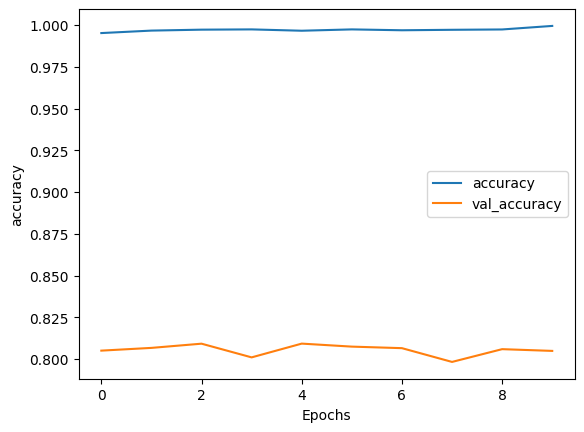

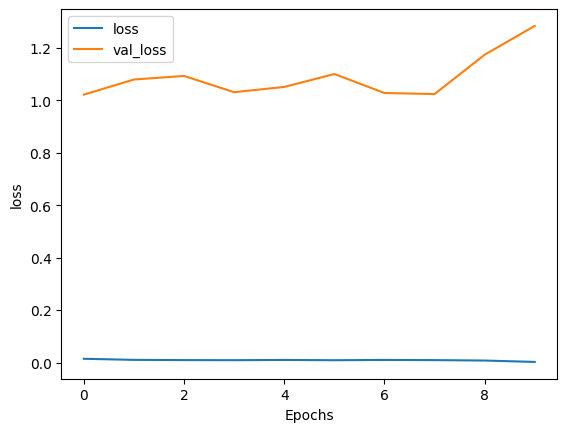

In [65]:
plot_graph(history_gru, 'accuracy')
plot_graph(history_gru, 'loss')

### Convolution

In [74]:
embedding_dim = 64
filters = 128
kernel_size = 5
dense_dim = 6

model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters, kernel_size=kernel_size, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_conv.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_conv.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 120, 64)           5120000   
                                                                 
 conv1d_2 (Conv1D)           (None, 116, 128)          41088     
                                                                 
 global_average_pooling1d_2   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_26 (Dense)            (None, 6)                 774       
                                                                 
 dense_27 (Dense)            (None, 1)                 7         
                                                                 
Total params: 5,161,869
Trainable params: 5,161,869
Non-trainable params: 0
___________________________________________

In [75]:
NUM_EPOCHS = 20
BATCH_SIZE = 128

# Train the model
history_conv = model_conv.fit(padded, training_labels_final, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(testing_padded, testing_labels_final))

Epoch 1/20
196/196 [==============================] - 27s 127ms/step - loss: 0.4784 - accuracy: 0.7689 - val_loss: 0.3555 - val_accuracy: 0.8472
Epoch 2/20
196/196 [==============================] - 15s 78ms/step - loss: 0.2207 - accuracy: 0.9132 - val_loss: 0.3798 - val_accuracy: 0.8393
Epoch 3/20
196/196 [==============================] - 11s 56ms/step - loss: 0.1152 - accuracy: 0.9619 - val_loss: 0.4708 - val_accuracy: 0.8237
Epoch 4/20
196/196 [==============================] - 7s 36ms/step - loss: 0.0588 - accuracy: 0.9828 - val_loss: 0.5896 - val_accuracy: 0.8159
Epoch 5/20
196/196 [==============================] - 6s 33ms/step - loss: 0.0285 - accuracy: 0.9936 - val_loss: 0.6846 - val_accuracy: 0.8131
Epoch 6/20
196/196 [==============================] - 5s 27ms/step - loss: 0.0130 - accuracy: 0.9981 - val_loss: 0.7777 - val_accuracy: 0.8078
Epoch 7/20
196/196 [==============================] - 6s 29ms/step - loss: 0.0069 - accuracy: 0.9993 - val_loss: 0.9117 - val_accuracy: 0.

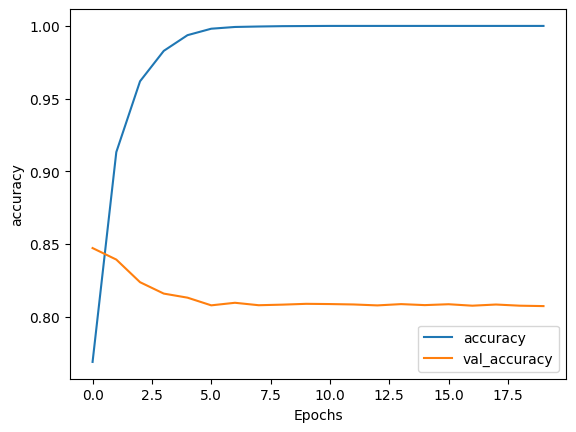

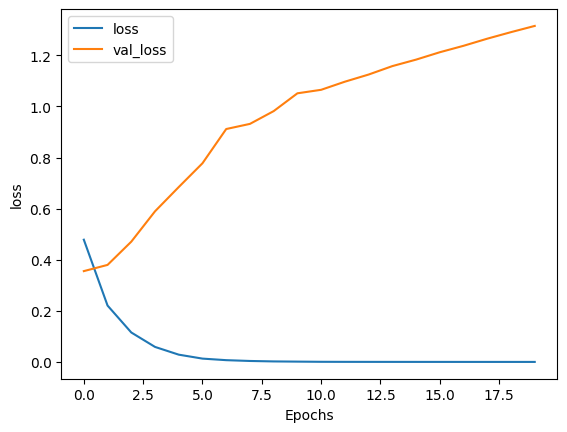

In [76]:
plot_graph(history_conv, 'accuracy')
plot_graph(history_conv, 'loss')